<a href="https://colab.research.google.com/github/rajeshraje434/rajeshraje434/blob/main/Aerofit_Business_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aerofit Business CASE_STUDY**

---








In [4]:
pip install pandas

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
dataset_path = "aerofit_treadmill.csv"
data = pd.read_csv("/content/aerofit_treadmill.csv")

In [14]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [32]:
print("\nData Info\n")
data.info()


Data Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [18]:
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [19]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [22]:
categorical_columns = ["Product", "Gender", "MaritalStatus"]
for col in categorical_columns:
    unique_values = data[col].unique()
    print(f"{col}: {unique_values}")

Product: ['KP281' 'KP481' 'KP781']
Gender: ['Male' 'Female']
MaritalStatus: ['Single' 'Partnered']


In [36]:
print("\nMissing values:\n")
print(data.isnull().sum())

# Check for duplicated rows
duplicates = data[data.duplicated()]
if len(duplicates) == 0:
    print("\nNo duplicated rows found.")
else:
    print("\nDuplicated rows:")
    print(duplicates)


Missing values:

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

No duplicated rows found.


In [42]:
print("\n Data Shape is: \n")
data.shape


 Data Shape is: 



(180, 9)

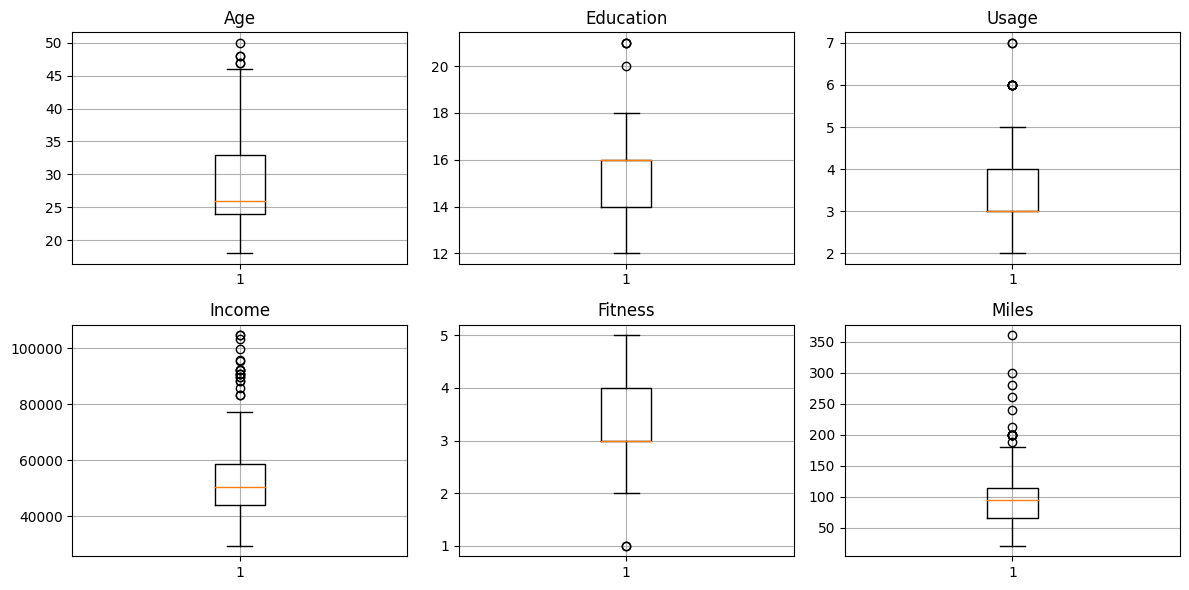

Column: Age, Number of Outliers: 5
Column: Education, Number of Outliers: 4
Column: Usage, Number of Outliers: 9
Column: Income, Number of Outliers: 19
Column: Fitness, Number of Outliers: 2
Column: Miles, Number of Outliers: 13


In [74]:
numerical_columns = ["Age", "Education", "Usage", "Income", "Fitness", "Miles"]

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(data[col])
    plt.title(col)
    plt.grid(True)

plt.tight_layout()
plt.show()

outliers = []
for col in numerical_columns:
    mean = data[col].mean()
    median = data[col].median()
    iqr = data[col].quantile(0.75) - data[col].quantile(0.25)
    lower_bound = data[col].quantile(0.25) - 1.5 * iqr
    upper_bound = data[col].quantile(0.75) + 1.5 * iqr

    outliers_col = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outliers.append((col, len(outliers_col)))

for col, num_outliers in outliers:
    print(f"Column: {col}, Number of Outliers: {num_outliers}")


 Age Vs Product



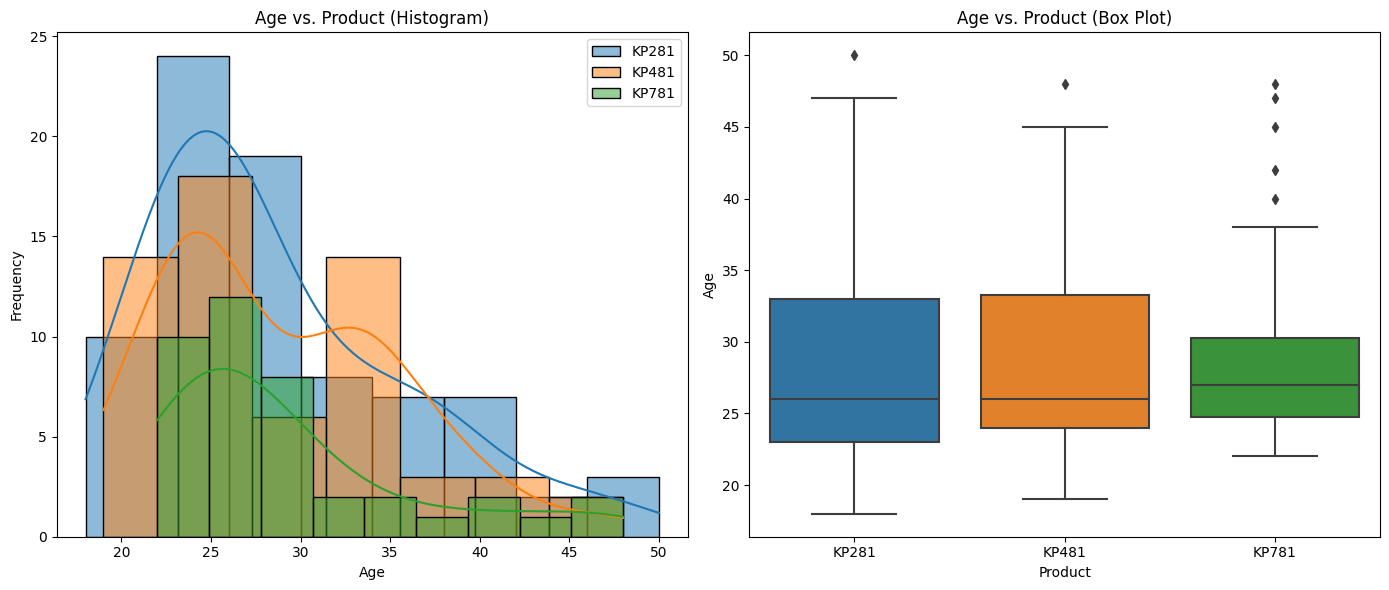

In [75]:
print("\n Age Vs Product\n")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram to compare the distribution of Age for different Product categories
for product in data["Product"].unique():
    sns.histplot(data[data["Product"] == product]["Age"], label=product, kde=True, ax=axes[0])

axes[0].set_title("Age vs. Product (Histogram)")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")
axes[0].legend()

# Box plot to visualize the relationship between Age and Product
sns.boxplot(data=data, x="Product", y="Age", ax=axes[1])
axes[1].set_title("Age vs. Product (Box Plot)")
axes[1].set_xlabel("Product")
axes[1].set_ylabel("Age")

# Adjust layout
plt.tight_layout()
plt.show()


 Gender Vs Product



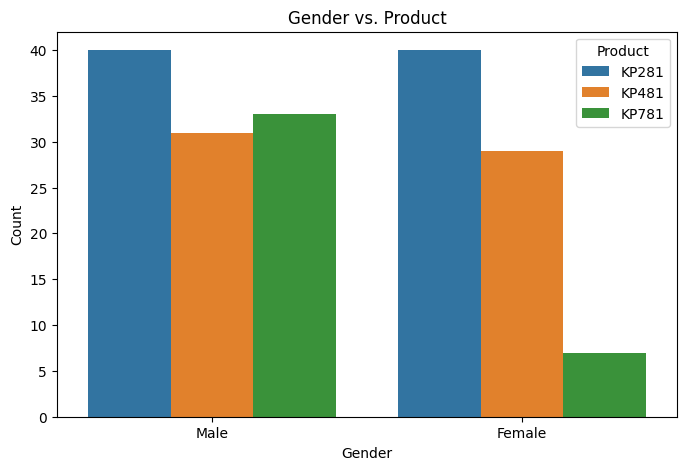

In [77]:
print("\n Gender Vs Product\n")
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x="Gender", hue="Product")
plt.title("Gender vs. Product")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


 Marital Status Vs Product



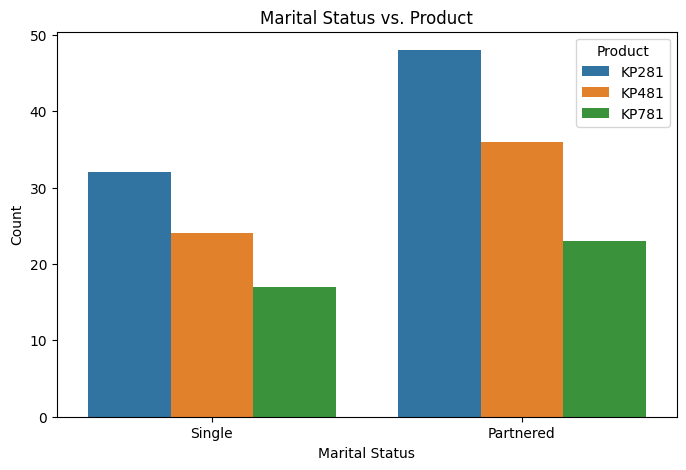

In [76]:
print("\n Marital Status Vs Product\n")
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x="MaritalStatus", hue="Product")
plt.title("Marital Status vs. Product")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()


 Income Vs Product



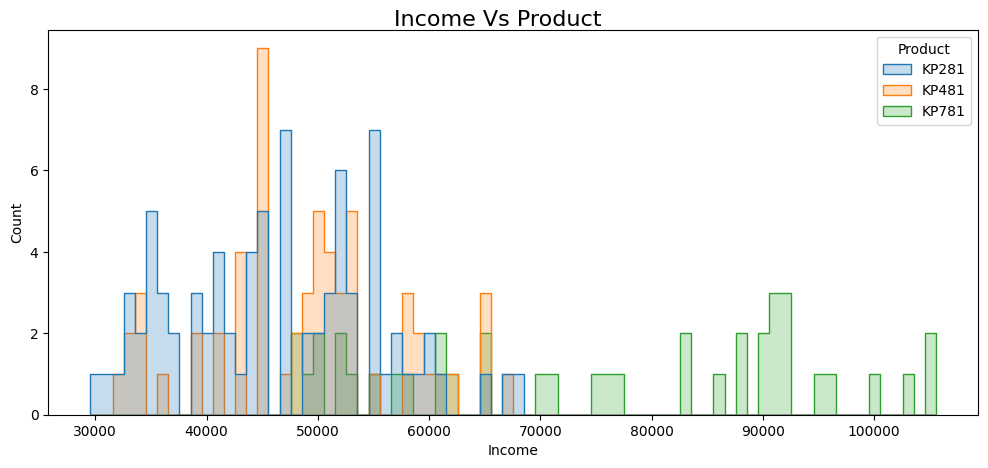

In [89]:
print("\n Income Vs Product\n")
binwidth = 1000

# Increase font size for the first line
plt.figure(figsize=(12, 5))
plt.text(0.5, 0.9, "Income Vs Product", fontsize=16, horizontalalignment='center', verticalalignment='center', transform=plt.gcf().transFigure)

# Count plot to visualize the relationship between Income and Product Purchased
sns.histplot(data=data, x="Income", hue="Product", binwidth=binwidth, element="step")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()


 Fitness Vs Product



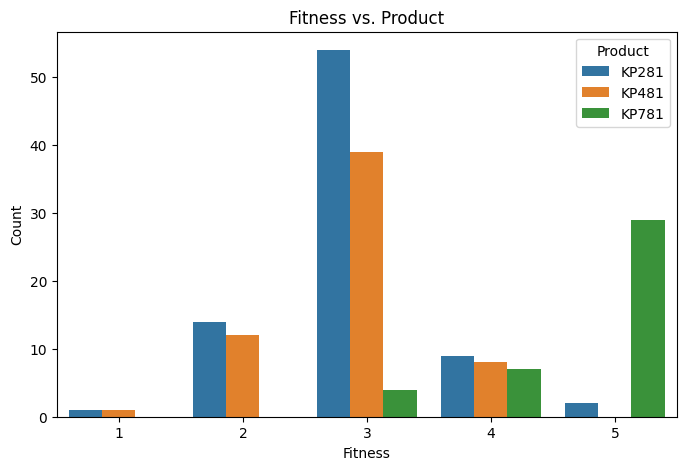

In [92]:
print("\n Fitness Vs Product\n")
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x="Fitness", hue="Product")
plt.title("Fitness vs. Product")
plt.xlabel("Fitness")
plt.ylabel("Count")
plt.show()

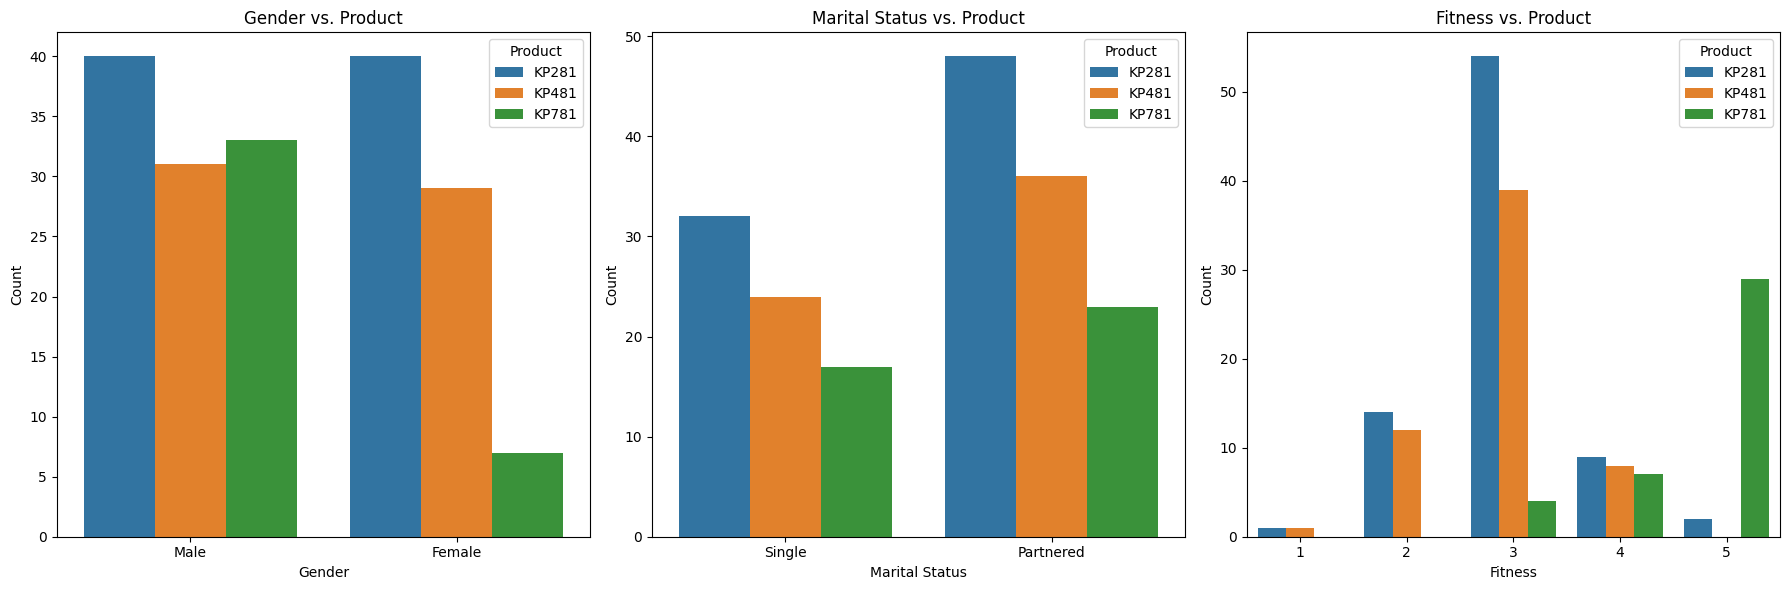

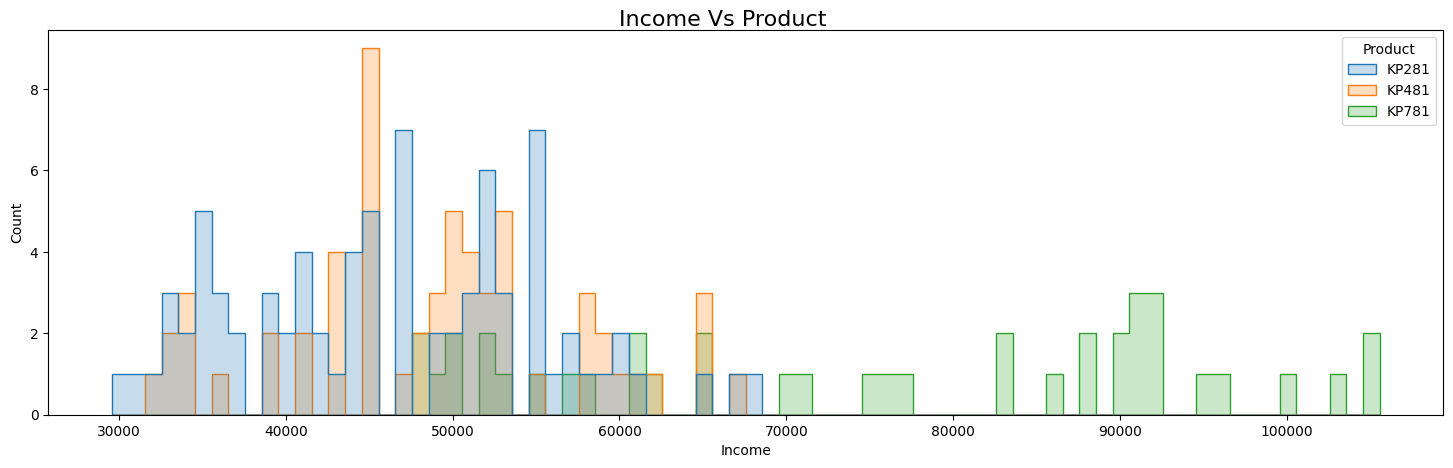

In [97]:
# Set up a grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gender Vs Product (1, 1, 1)
plt.sca(axes[0])
sns.countplot(data=data, x="Gender", hue="Product")
plt.title("Gender vs. Product")
plt.xlabel("Gender")
plt.ylabel("Count")

# Marital Status Vs Product (1, 1, 2)
plt.sca(axes[1])
sns.countplot(data=data, x="MaritalStatus", hue="Product")
plt.title("Marital Status vs. Product")
plt.xlabel("Marital Status")
plt.ylabel("Count")

# Fitness Vs Product (1, 1, 3)
plt.sca(axes[2])
sns.countplot(data=data, x="Fitness", hue="Product")
plt.title("Fitness vs. Product")
plt.xlabel("Fitness")
plt.ylabel("Count")

plt.tight_layout()

# Income Vs Product (2)
binwidth = 1000

# Increase font size for the first line
plt.figure(figsize=(18, 5))
plt.text(0.5, 0.9, "Income Vs Product", fontsize=16, horizontalalignment='center', verticalalignment='center', transform=plt.gcf().transFigure)

# Count plot to visualize the relationship between Income and Product Purchased
sns.histplot(data=data, x="Income", hue="Product", binwidth=binwidth, element="step")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

plt.show()


# **Insights:**
1. Majority of the top rated fitness customers are willing to buy KP781.
2. Income of the KP781 is the generating the equal amount of revenue compares to the other products.
3. Focus on promoting the products on maintain or improve their fitness, develop the marketing campaigns on health benefits of your products.

In [98]:
# Assuming "Product" is the column name in your dataset
# Replace it with the correct column name if needed
marginal_probabilities = pd.crosstab(index=data['Product'], columns='Count', normalize='columns')

# Rename the columns for clarity
marginal_probabilities.columns = ['Marginal Probability']

# Convert the result to percentages
marginal_probabilities['Marginal Probability'] = marginal_probabilities['Marginal Probability'] * 100

print("Marginal Probability of Product:")
print(marginal_probabilities)


Marginal Probability of Product:
         Marginal Probability
Product                      
KP281               44.444444
KP481               33.333333
KP781               22.222222


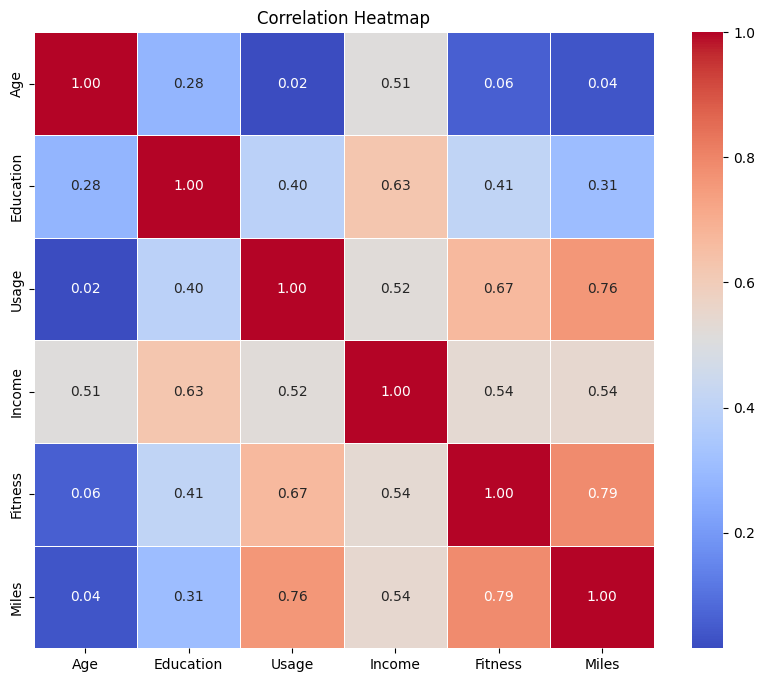

In [101]:
# Select numerical columns for correlation analysis
numerical_columns = ["Age", "Education", "Usage", "Income", "Fitness", "Miles"]

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

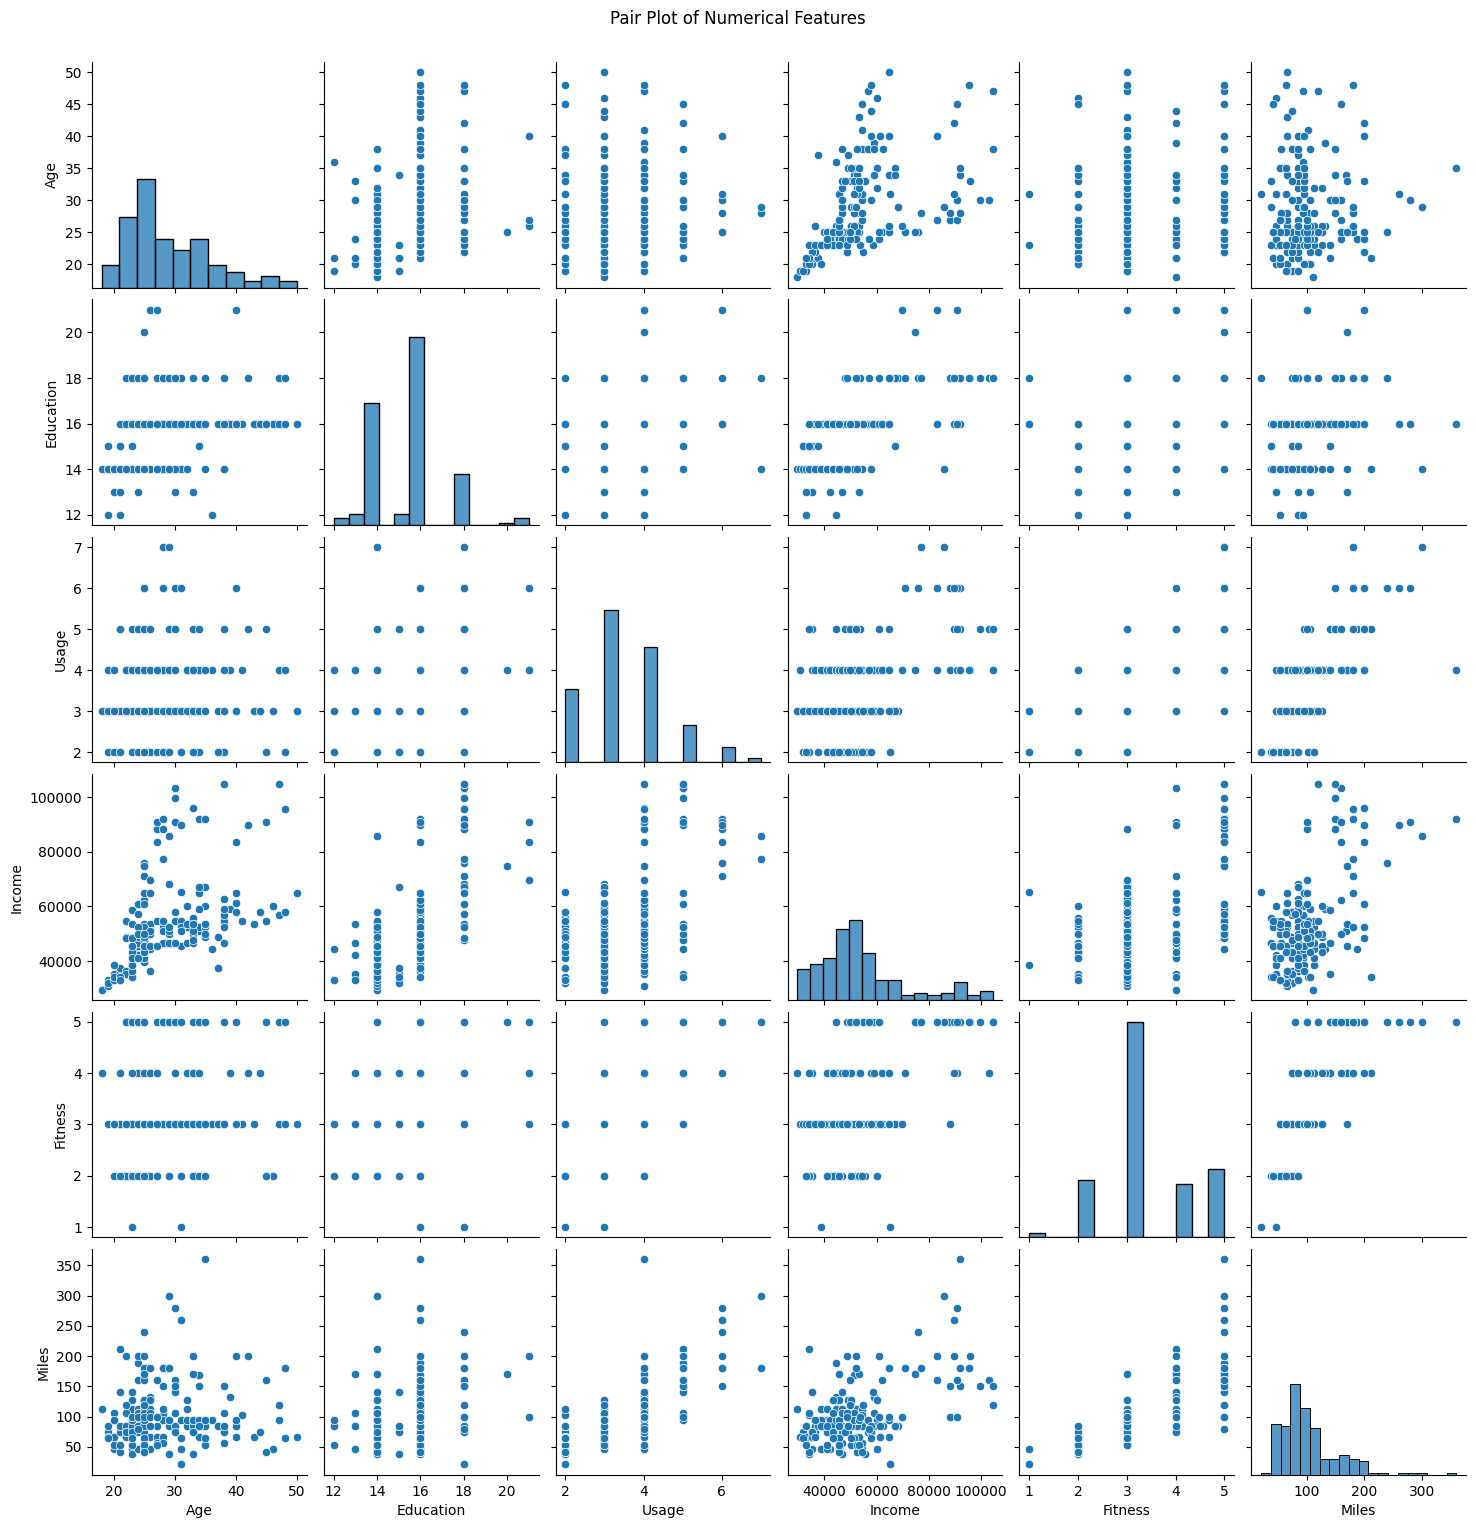

In [102]:
# Select numerical columns for pair plot
numerical_columns = ["Age", "Education", "Usage", "Income", "Fitness", "Miles"]

# Create a pair plot
sns.pairplot(data[numerical_columns])
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

Probability of a male customer buying a KP781 treadmill over Total Male: 0.32
----------------------------------------------------------------------------------------------------
Probability of a Female customer buying a KP781 treadmill over Total Female: 0.09
----------------------------------------------------------------------------------------------------


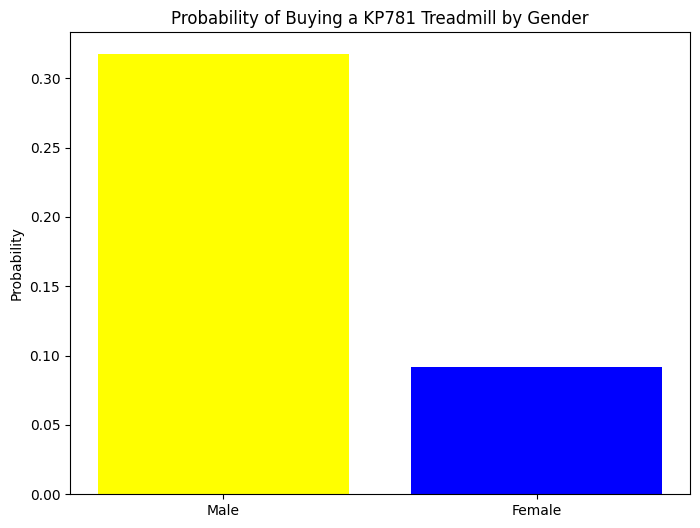

In [127]:
# Total number of male customers
total_male_customers = len(data[data['Gender'] == 'Male'])

# Total number of male customers who bought a KP781 treadmill
male_customers_with_KP781 = len(data[(data['Gender'] == 'Male') & (data['Product'] == 'KP781')])

# Calculate the probability
probability_male_buy_KP781 = male_customers_with_KP781 / total_male_customers

print(f"Probability of a male customer buying a KP781 treadmill over Total Male: {probability_male_buy_KP781:.2f}")

print("-"*100)

# Total number of Female customers
total_Female_customers = len(data[data['Gender'] == 'Female'])

# Total number of Female customers who bought a KP781 treadmill
Female_customers_with_KP781 = len(data[(data['Gender'] == 'Female') & (data['Product'] == 'KP781')])

# Calculate the probability
probability_Female_buy_KP781 = Female_customers_with_KP781 / total_Female_customers

print(f"Probability of a Female customer buying a KP781 treadmill over Total Female: {probability_Female_buy_KP781:.2f}")

print("-"*100)

probabilities = [probability_male_buy_KP781, probability_Female_buy_KP781]

categories = ['Male', 'Female']

plt.figure(figsize=(8, 6))
plt.bar(categories, probabilities, color=['Yellow', 'Blue'])
plt.title("Probability of Buying a KP781 Treadmill by Gender")
plt.ylabel("Probability")
plt.show()


Insight:
1. On total male & female, majority of the Males are purchasing the KP781.

Probability of a Male customer buying a KP781 treadmill: 0.82
----------------------------------------------------------------------------------------------------
Probability of a Female customer buying a KP781 treadmill: 0.17
----------------------------------------------------------------------------------------------------


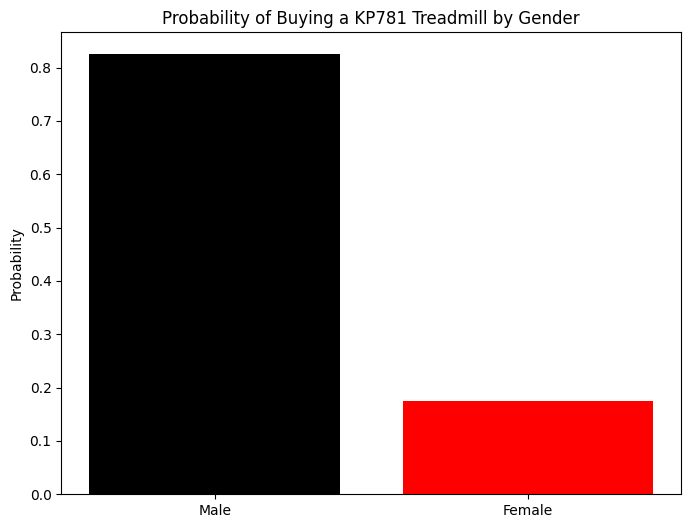

In [125]:
# Calculate the total number of customers who purchased a KP781 treadmill
total_KP781_customers = len(data[data["Product"] == "KP781"])

# Calculate the total number of male customers who purchased a KP781 treadmill
male_KP781_customers = len(data[(data["Product"] == "KP781") & (data["Gender"] == "Male")])

# Calculate the total number of female customers who purchased a KP781 treadmill
female_KP781_customers = len(data[(data["Product"] == "KP781") & (data["Gender"] == "Female")])

# Calculate the probability of a Male customer buying a KP781 treadmill
probability_male_KP781 = male_KP781_customers / total_KP781_customers

# Calculate the probability of a Female customer buying a KP781 treadmill
probability_female_KP781 = female_KP781_customers / total_KP781_customers

# Print the probabilities
print(f"Probability of a Male customer buying a KP781 treadmill: {probability_male_KP781:.2f}")
print("-"*100)
print(f"Probability of a Female customer buying a KP781 treadmill: {probability_female_KP781:.2f}")
print("-"*100)
# Probability values
probabilities = [probability_male_KP781, probability_female_KP781]

# Categories (Male and Female)
categories = ['Male', 'Female']

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(categories, probabilities, color=['Black', 'Red'])
plt.title("Probability of Buying a KP781 Treadmill by Gender")
plt.ylabel("Probability")
plt.show()

Probability of a Male customer buying a KP481 treadmill: 0.52
----------------------------------------------------------------------------------------------------
Probability of a Female customer buying a KP481 treadmill: 0.48
----------------------------------------------------------------------------------------------------


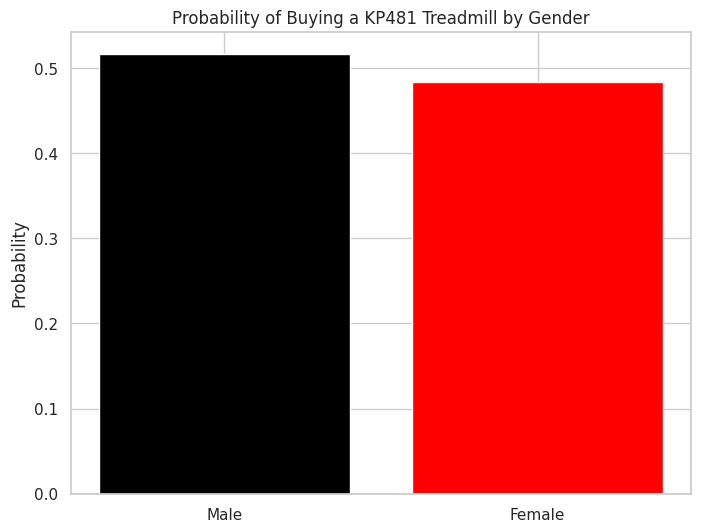

In [161]:
# Calculate the total number of customers who purchased a KP481 treadmill
total_KP481_customers = len(data[data["Product"] == "KP481"])

# Calculate the total number of male customers who purchased a KP481 treadmill
male_KP481_customers = len(data[(data["Product"] == "KP481") & (data["Gender"] == "Male")])

# Calculate the total number of female customers who purchased a KP481 treadmill
female_KP481_customers = len(data[(data["Product"] == "KP481") & (data["Gender"] == "Female")])

# Calculate the probability of a Male customer buying a KP481 treadmill
probability_male_KP481 = male_KP481_customers / total_KP481_customers

# Calculate the probability of a Female customer buying a KP481 treadmill
probability_female_KP481 = female_KP481_customers / total_KP481_customers

# Print the probabilities
print(f"Probability of a Male customer buying a KP481 treadmill: {probability_male_KP481:.2f}")
print("-"*100)
print(f"Probability of a Female customer buying a KP481 treadmill: {probability_female_KP481:.2f}")
print("-"*100)
# Probability values
probabilities = [probability_male_KP481, probability_female_KP481]

# Categories (Male and Female)
categories = ['Male', 'Female']

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(categories, probabilities, color=['Black', 'Red'])
plt.title("Probability of Buying a KP481 Treadmill by Gender")
plt.ylabel("Probability")
plt.show()

Probability of a Male customer buying a KP281 treadmill: 0.50
----------------------------------------------------------------------------------------------------
Probability of a Female customer buying a KP281 treadmill: 0.50
----------------------------------------------------------------------------------------------------


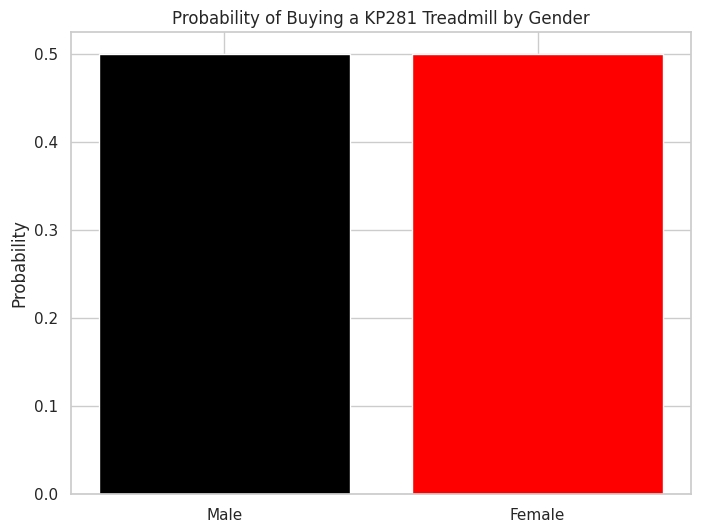

In [162]:
# Calculate the total number of customers who purchased a KP281 treadmill
total_KP281_customers = len(data[data["Product"] == "KP281"])

# Calculate the total number of male customers who purchased a KP281 treadmill
male_KP281_customers = len(data[(data["Product"] == "KP281") & (data["Gender"] == "Male")])

# Calculate the total number of female customers who purchased a KP281 treadmill
female_KP281_customers = len(data[(data["Product"] == "KP281") & (data["Gender"] == "Female")])

# Calculate the probability of a Male customer buying a KP281 treadmill
probability_male_KP281 = male_KP281_customers / total_KP281_customers

# Calculate the probability of a Female customer buying a KP281 treadmill
probability_female_KP281 = female_KP281_customers / total_KP281_customers

# Print the probabilities
print(f"Probability of a Male customer buying a KP281 treadmill: {probability_male_KP281:.2f}")
print("-"*100)
print(f"Probability of a Female customer buying a KP281 treadmill: {probability_female_KP281:.2f}")
print("-"*100)
# Probability values
probabilities = [probability_male_KP281, probability_female_KP281]

# Categories (Male and Female)
categories = ['Male', 'Female']

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(categories, probabilities, color=['Black', 'Red'])
plt.title("Probability of Buying a KP281 Treadmill by Gender")
plt.ylabel("Probability")
plt.show()

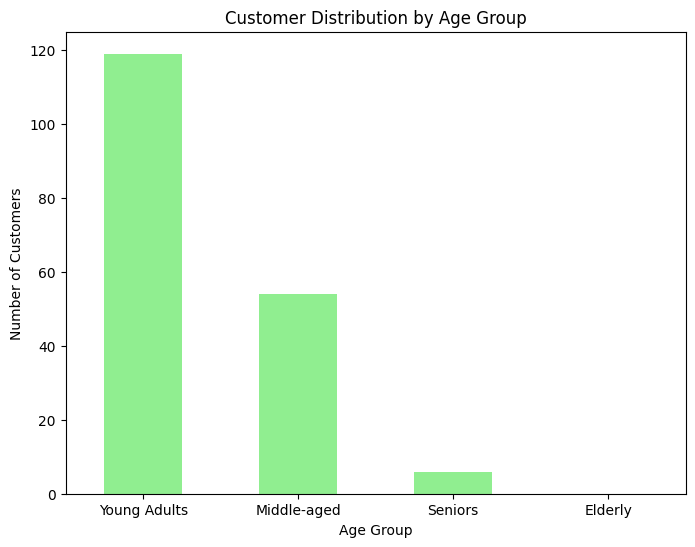

In [133]:
# Create age groups
bins = [18, 30, 45, 60, 100]
labels = ["Young Adults", "Middle-aged", "Seniors", "Elderly"]
data["AgeGroup"] = pd.cut(data["Age"], bins=bins, labels=labels)

# Count the number of customers in each age group
age_group_counts = data["AgeGroup"].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
age_group_counts.plot(kind="bar", color="lightgreen")
plt.title("Customer Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.show()

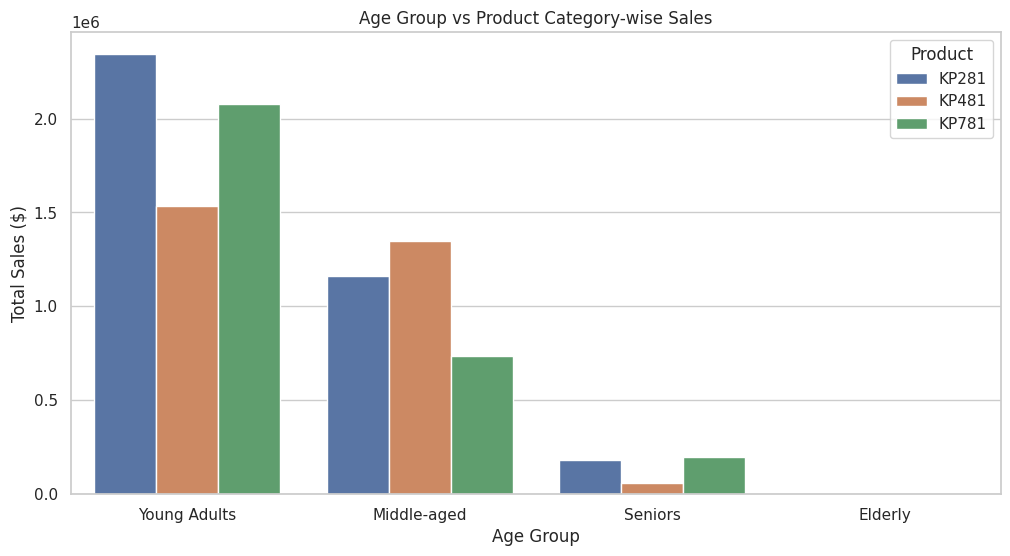

In [168]:
# Create age groups (as defined earlier in the analysis)
bins = [18, 30, 45, 60, 100]
labels = ["Young Adults", "Middle-aged", "Seniors", "Elderly"]
data["AgeGroup"] = pd.cut(data["Age"], bins=bins, labels=labels)

# Group data by age group and product purchased, then calculate total sales
sales_by_agegroup = data.groupby(['AgeGroup', 'Product'])['Income'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_agegroup, x="AgeGroup", y="Income", hue="Product", order=labels)
plt.title("Age Group vs Product Category-wise Sales")
plt.xlabel("Age Group")
plt.ylabel("Total Sales ($)")
plt.legend(title="Product")
plt.show()


# **Insights:**
1. Major of the Young adults are interested to buy KP281 & KP781 products.
2. Better to provide some offers based on age group.
3. Run the campaigns at Universities etc.

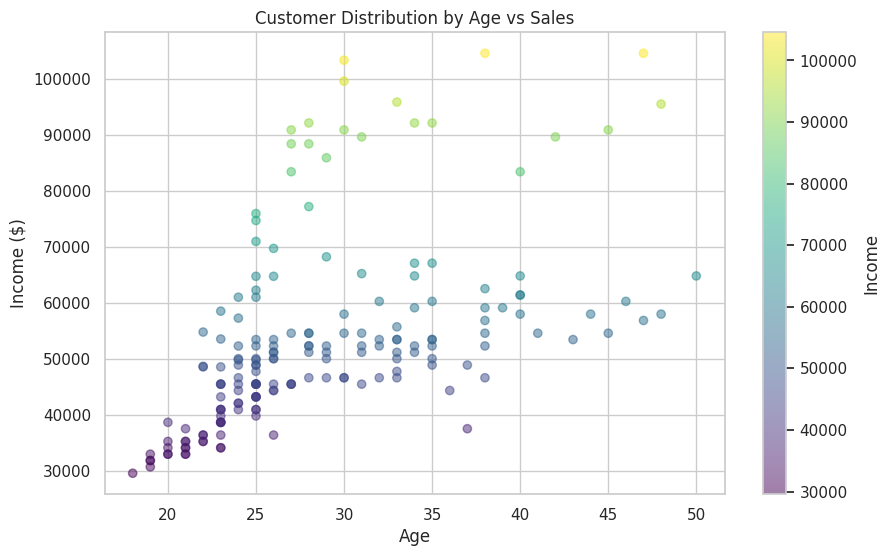

In [163]:
plt.figure(figsize=(10, 6))
plt.scatter(data["Age"], data["Income"], alpha=0.5, c=data["Income"], cmap='viridis')
plt.title("Customer Distribution by Age vs Sales")
plt.xlabel("Age")
plt.ylabel("Income ($)")
plt.colorbar(label="Income")
plt.show()


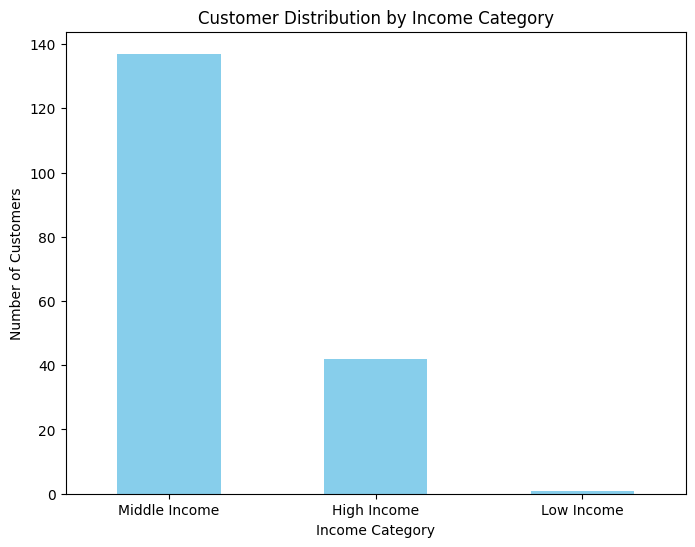

In [137]:
# Define the income category bins and labels
income_bins = [0, 30000, 60000, float('inf')]  # Define income categories
income_labels = ["Low Income", "Middle Income", "High Income"]

# Create a new column 'IncomeCategory' based on the 'Income' column
data['IncomeCategory'] = pd.cut(data['Income'], bins=income_bins, labels=income_labels)

# Count the number of customers in each income category
income_category_counts = data['IncomeCategory'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
income_category_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()


# **Insights:**
1. Middle income category customers are higher in count compares to other categories, so majority of the sales also happening from middle class customers.
2. Better to provide some discount on products to generate more revenue & more sales of the products.

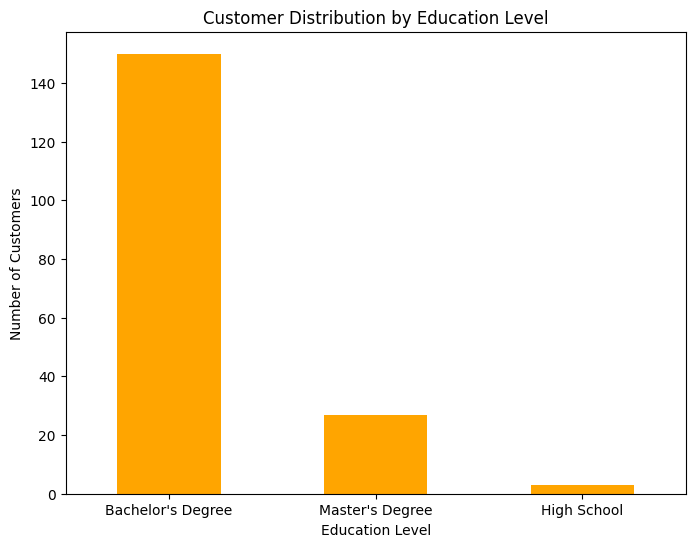

In [142]:
# Define the education level bins and labels
education_bins = [0, 12, 16, float('inf')]  # Define education level categories in years
education_labels = ["High School", "Bachelor's Degree", "Master's Degree"]

# Create a new column 'EducationLevel' based on the 'Education' column
data['EducationLevel'] = pd.cut(data['Education'], bins=education_bins, labels=education_labels)

# Count the number of customers in each education level category
education_level_counts = data['EducationLevel'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
education_level_counts.plot(kind='bar', color='orange')
plt.title('Customer Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()


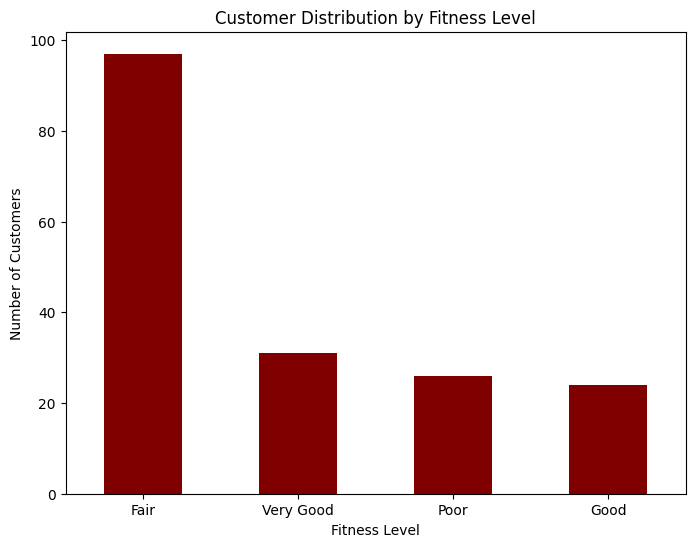

In [146]:
# Define the fitness level bins and labels
fitness_bins = [1, 2, 3, 4, 5]  # Fitness rating scale (1 to 5)
fitness_labels = ["Poor", "Fair", "Good", "Very Good"]

# Create a new column 'FitnessLevel' based on the 'Fitness' column
data['FitnessLevel'] = pd.cut(data['Fitness'], bins=fitness_bins, labels=fitness_labels)

# Count the number of customers in each fitness level category
fitness_level_counts = data['FitnessLevel'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
fitness_level_counts.plot(kind='bar', color='maroon')
plt.title('Customer Distribution by Fitness Level')
plt.xlabel('Fitness Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

In [151]:
# Create a cross-tabulation of 'Product Purchased' and 'Gender'
cross_table = pd.crosstab(data['Product'], data['Gender'], normalize='index')

print(cross_table)

print("-"*100)

# Create a cross-tabulation of 'Product Purchased' and 'MaritalStatus'
cross_table = pd.crosstab(data['Product'], data['MaritalStatus'], normalize='index')

print(cross_table)


Gender     Female      Male
Product                    
KP281    0.500000  0.500000
KP481    0.483333  0.516667
KP781    0.175000  0.825000
----------------------------------------------------------------------------------------------------
MaritalStatus  Partnered  Single
Product                         
KP281              0.600   0.400
KP481              0.600   0.400
KP781              0.575   0.425


# Insights:
1. The customers who are partnered they 've higher income on average when compares to single customers.
2. To attract partnered customers provide discounts to couples or Families.

In [156]:
# Define the prices for each product
price_KP281 = 1500
price_KP481 = 1750
price_KP781 = 2500

# Calculate the total sales for each product
total_sales_KP281 = data[data["Product"] == "KP281"]["Product"].count() * price_KP281
total_sales_KP481 = data[data["Product"] == "KP481"]["Product"].count() * price_KP481
total_sales_KP781 = data[data["Product"] == "KP781"]["Product"].count() * price_KP781

# Calculate the overall total sales
overall_total_sales = total_sales_KP281 + total_sales_KP481 + total_sales_KP781

# Print the total sales for each product and the overall total sales
print(f"Total Sales of KP281: ${total_sales_KP281:,.2f}")
print(f"Total Sales of KP481: ${total_sales_KP481:,.2f}")
print(f"Total Sales of KP781: ${total_sales_KP781:,.2f}")
print(f"Overall Total Sales: ${overall_total_sales:,.2f}")


Total Sales of KP281: $120,000.00
Total Sales of KP481: $105,000.00
Total Sales of KP781: $100,000.00
Overall Total Sales: $325,000.00


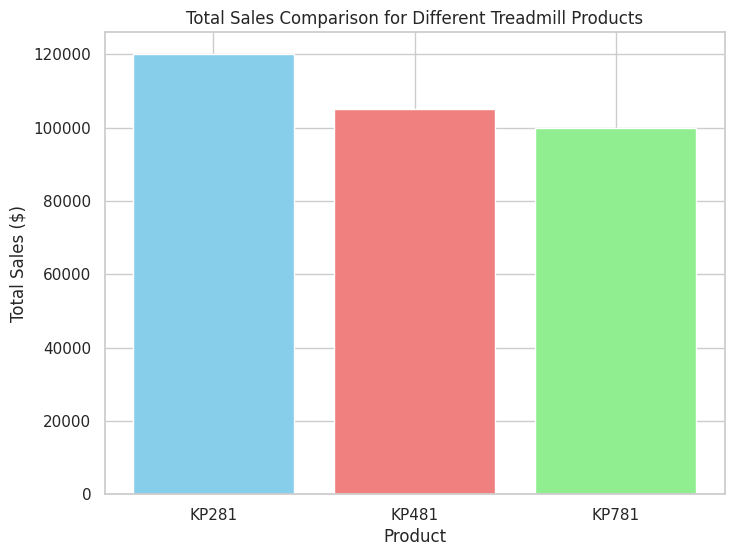

In [157]:
# Total sales data
products = ["KP281", "KP481", "KP781"]
total_sales = [120000, 105000, 100000]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(products, total_sales, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title("Total Sales Comparison for Different Treadmill Products")
plt.xlabel("Product")
plt.ylabel("Total Sales ($)")
plt.show()


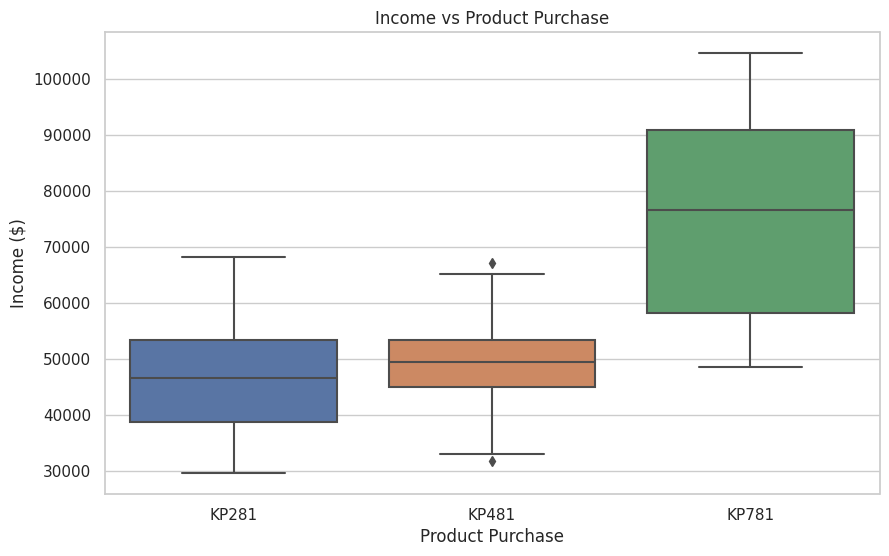

In [159]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Product", y="Income", order=["KP281", "KP481", "KP781"])
plt.title("Income vs Product Purchase")
plt.xlabel("Product Purchase")
plt.ylabel("Income ($)")
plt.show()


# **Insights:**
1. When comparesion takes place on Product Vs Sales, KP281 sales is greater than the other products.
2. In Income Vs Product Purchase, average income customers are prefers KP281 product compares to other products.
3. Focus on produce the Major number of KP281 products, so when comes to delivery point of view it may easy (1 Day Delivery).